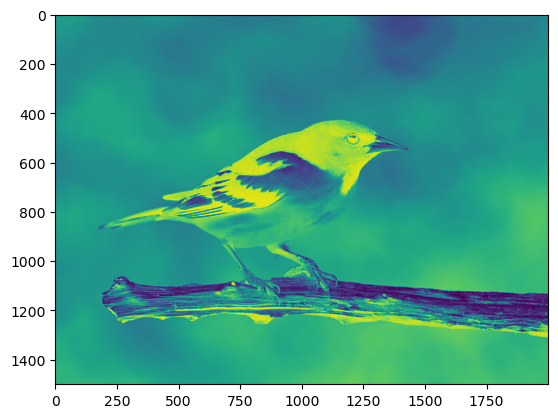

In [3]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

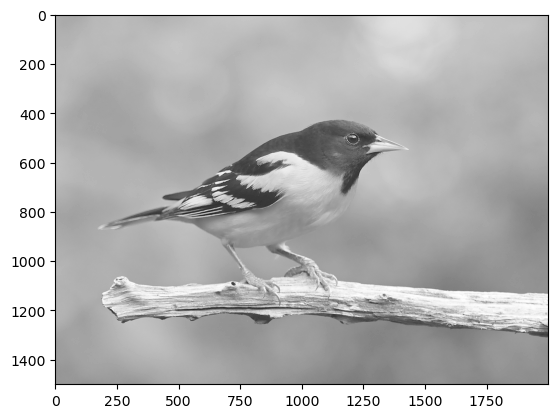

In [4]:
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt

try:
    img = Image.open('bird.png').convert('L')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'bird.png'. Vui lòng kiểm tra lại đường dẫn.")
    exit()

im_1 = np.asarray(img)

gamma = 0.5

b1 = im_1.astype(float)

norm_img = b1 / 255.0 

gamma_corrected_norm = np.power(norm_img, gamma)

c = gamma_corrected_norm * 255.0

c = np.clip(c, 0, 255)


c1 = c.astype(np.uint8) 

d = Image.fromarray(c1)



plt.imshow(d, cmap='gray') 
plt.show()

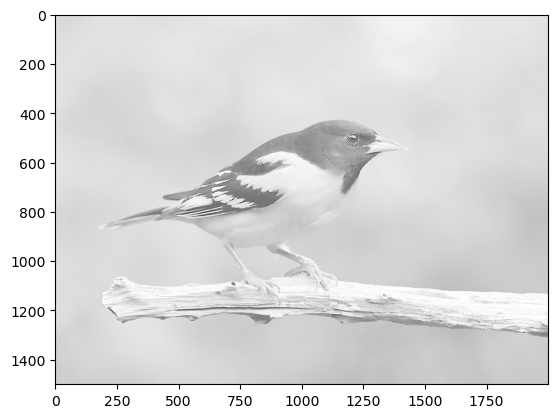

In [5]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt


try:
    img = Image.open('bird.png').convert('L')
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file 'bird.png'. Vui lòng kiểm tra lại đường dẫn.")
    exit()


im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2_max = np.max(b1) 


if b2_max == 0: 
    c = np.zeros_like(b1) 
else: 
    c = (128.0 * np.log(1 + b1)) / np.log(1 + b2_max)

c = np.clip(c, 0, 255) 

c1 = c.astype(np.uint8) 

d = Image.fromarray(c1)


plt.imshow(d, cmap='gray') 
plt.show()

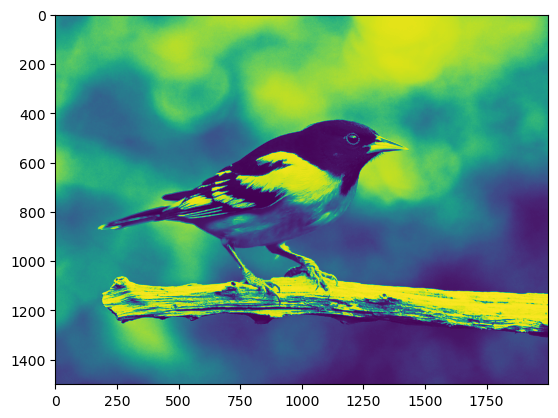

In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
iml = np.asarray(img)
bl = iml.flatten()
hist, bins = np.histogram(iml, 256, [0, 255])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m / den_cdf_m
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
im2 = cdf[bl]
im3 = np.reshape(im2, iml.shape)
im4 = Image.fromarray(im3)
img.show()
im4.show()
plt.imshow(im4)
plt.show()

0 255


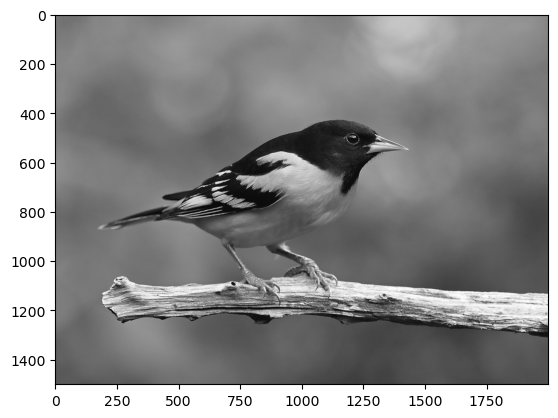

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()
print(a, b)
# converting iml to float
c = iml.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a) / (b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

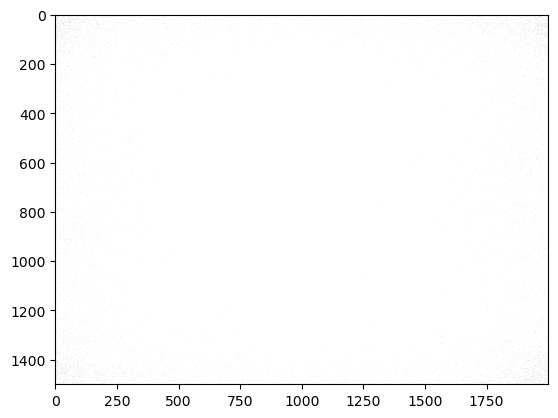

In [8]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
#im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

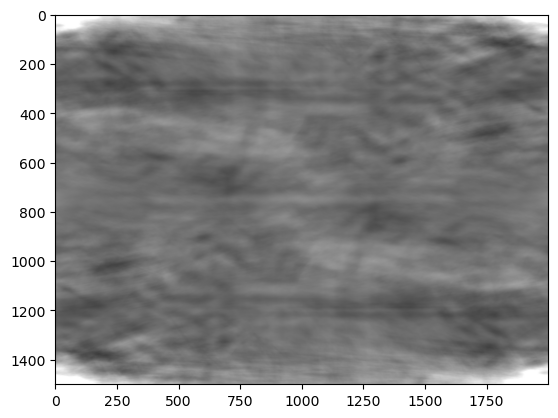

In [9]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
iml = np.asarray(img)
c = abs(scipy.fftpack.fft2(iml))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 1
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)
    
        r = math.sqrt(r1)
    
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t1)
H = H.astype(float)
Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

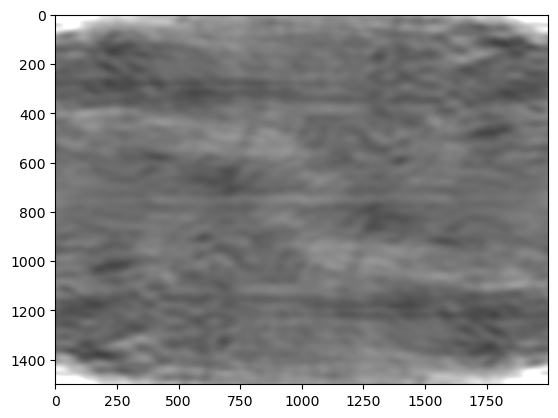

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt

img = Image.open('bird.png').convert('L')
iml = np.asarray(img)
c = abs(scipy.fftpack.fft2(iml))
d = scipy.fftpack.fftshift(c)
M = d.shape[0]
N = d.shape[1]
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d_0 = 30.0
t1 = 2
t2 = 2 * t1

for i in range(1, M):
    for j in range(1, N):
        r1 = ((i - center1)**2 + (j - center2)**2)   
        r = math.sqrt(r1)
        if r > d_0:
            H[i, j] = 1 / (1 + (r / d_0)**t2)
            
H = H.astype(float)
Image.fromarray(H)
con = d * H
e = abs(scipy.fftpack.ifft2(con))
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()